In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
pwd()

'/workspace/code/Class_Eco'

In [5]:
import os
os.getcwd()

'/workspace/code/Class_Eco'

## 前処理

In [6]:
#データ取得
#df_origin = pd.read_csv("../data/train.csv").drop("Unnamed: 0", axis=1).dropna()
df_origin = pd.read_csv('/workspace/data/train.csv').drop("Unnamed: 0", axis=1).dropna()


In [7]:
#欠損値の削除
df_origin = df_origin.dropna()
df_origin.head(2)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied


In [8]:
#欠損値有無の確認
is_null = df_origin.isnull()
null_counts = is_null.sum()
null_counts

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
##Class毎に抽出する
business= df_origin.query('Class == "Business"')
eco = df_origin.query('Class == "Eco"')
eco_plus = df_origin.query('Class == "Eco Plus"')
#データ数削減
business_new = business.sample(n=11500, random_state=42)
eco_new = eco.sample(n=11500, random_state=42)
#データを結合
df = pd.concat([eco_new, business_new, eco_plus], axis=0)
#クラスの割合を確認
df["Class"].value_counts()

Class
Eco         11500
Business    11500
Eco Plus     7468
Name: count, dtype: int64

In [10]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query('Class == "Eco Plus"')

In [11]:
#id,unnamed,class,satisfaction 不要な列を消す
#ecoクラスのsatisfaction　は残す

df_Busi_del = df_Busi.drop(['id','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','satisfaction','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','satisfaction','Class'], axis=1)

In [12]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [13]:
'''
Gender_Male　　0=男性,1=女性
'''

df_Eco_enc.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
85208,69,546,2,5,2,4,3,4,5,4,...,2,4,4,4,2,0,0.0,0,0,1
31633,31,842,3,5,3,1,1,3,1,1,...,3,5,5,4,1,35,16.0,1,0,1


In [14]:
df_Eco_enc = df_Eco_enc.reset_index(drop=True)
Eco_enc_df = df_Eco_enc

In [15]:
df_Busi_enc.shape

(11500, 21)

In [16]:
df_Eco_enc.shape

(11500, 21)

In [17]:
df_Plus_enc.shape

(7468, 21)

In [18]:
df_Busi_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [19]:
df_Eco_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [20]:
df_Plus_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [21]:
Eco_enc_df.info()

'''
0   Age                                年齢
1   Flight Distance                    飛行距離
2   Inflight wifi service              機内wifiサービス
3   Departure/Arrival time convenient  出発・到着時間の利便性
4   Ease of Online booking             オンライン予約のしやすさ
5   Gate location                      ゲートの位置
6   Food and drink                     飲食
7   Online boarding                    オンライン搭乗
8   Seat comfort                       シートの快適性
9   Inflight entertainment             機内エンターテインメント
10  On-board service                    機内サービス
11  Leg room service                    レッグルームサービス
12  Baggage handling                    手荷物取扱い
13  Checkin service                     チェックイン・サービス
14  Inflight service                    機内サービス
15  Cleanliness                         清潔さ
16  Departure Delay in Minutes          出発の遅れ（分）
17  Arrival Delay in Minutes            到着遅延（分）
18  Gender_Male                         性別_男性
19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客
20  Type of Travel_Personal Travel      旅行タイプ_個人旅行
21  satisfaction_satisfied              満足度_満足

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11500 non-null  int64  
 1   Flight Distance                    11500 non-null  int64  
 2   Inflight wifi service              11500 non-null  int64  
 3   Departure/Arrival time convenient  11500 non-null  int64  
 4   Ease of Online booking             11500 non-null  int64  
 5   Gate location                      11500 non-null  int64  
 6   Food and drink                     11500 non-null  int64  
 7   Online boarding                    11500 non-null  int64  
 8   Seat comfort                       11500 non-null  int64  
 9   Inflight entertainment             11500 non-null  int64  
 10  On-board service                   11500 non-null  int64  
 11  Leg room service                   11500 non-null  int

'\n0   Age                                年齢\n1   Flight Distance                    飛行距離\n2   Inflight wifi service              機内wifiサービス\n3   Departure/Arrival time convenient  出発・到着時間の利便性\n4   Ease of Online booking             オンライン予約のしやすさ\n5   Gate location                      ゲートの位置\n6   Food and drink                     飲食\n7   Online boarding                    オンライン搭乗\n8   Seat comfort                       シートの快適性\n9   Inflight entertainment             機内エンターテインメント\n10  On-board service                    機内サービス\n11  Leg room service                    レッグルームサービス\n12  Baggage handling                    手荷物取扱い\n13  Checkin service                     チェックイン・サービス\n14  Inflight service                    機内サービス\n15  Cleanliness                         清潔さ\n16  Departure Delay in Minutes          出発の遅れ（分）\n17  Arrival Delay in Minutes            到着遅延（分）\n18  Gender_Male                         性別_男性\n19  Customer Type_disloyal Customer     顧客タイプ_不誠実な顧客\n20  Type of Travel_P

## Ecoクラス分析

### 次元削減とクラスタリング

In [22]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler

In [23]:
df_Eco_enc.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel'],
      dtype='object')

In [24]:
# 数値列のみを選択
numeric_columns = ['Gender_Male','Customer Type_disloyal Customer','Age',
                   'Type of Travel_Personal Travel','Flight Distance','Departure/Arrival time convenient','Arrival Delay in Minutes']
df_Eco_enc[numeric_columns]

,Gender_Male,Customer Type_disloyal Customer,Age,Type of Travel_Personal Travel,Flight Distance,Departure/Arrival time convenient,Arrival Delay in Minutes
0,0,0,69,1,546,5,0.0
1,1,0,31,1,842,5,16.0
2,0,0,62,1,1372,4,0.0
3,0,1,41,0,1771,3,23.0
4,0,0,18,1,937,5,0.0
...,...,...,...,...,...,...,...
11495,1,0,26,1,1055,4,0.0
11496,1,0,60,1,1400,5,160.0
11497,1,0,36,0,1546,5,0.0
11498,0,0,25,1,240,4,8.0


In [25]:
df_Eco_enc[numeric_columns].head(2)

,Gender_Male,Customer Type_disloyal Customer,Age,Type of Travel_Personal Travel,Flight Distance,Departure/Arrival time convenient,Arrival Delay in Minutes
0,0,0,69,1,546,5,0.0
1,1,0,31,1,842,5,16.0


In [26]:
# StandardScalerを適用
scaler = StandardScaler()
df_Eco_enc_std = scaler.fit_transform(df_Eco_enc[numeric_columns])

In [27]:
#T-sneで次元削減
tsne = TSNE(n_components=2)
eco_tsne = tsne.fit_transform(df_Eco_enc_std)

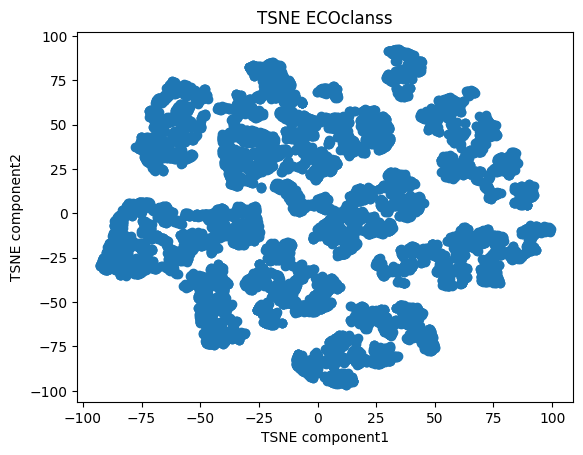

In [28]:
plt.scatter(eco_tsne[:,0],eco_tsne[:,1])
plt.xlabel('TSNE component1')
plt.ylabel('TSNE component2')
plt.title('TSNE ECOclanss')
plt.show()

/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

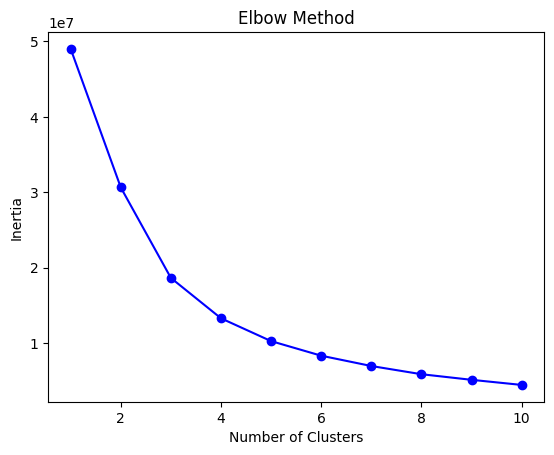

In [29]:
inertia = []
k_values = range(1, 11)  # クラスタ数の範囲を設定

for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=300)
    kmeans.fit(eco_tsne)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

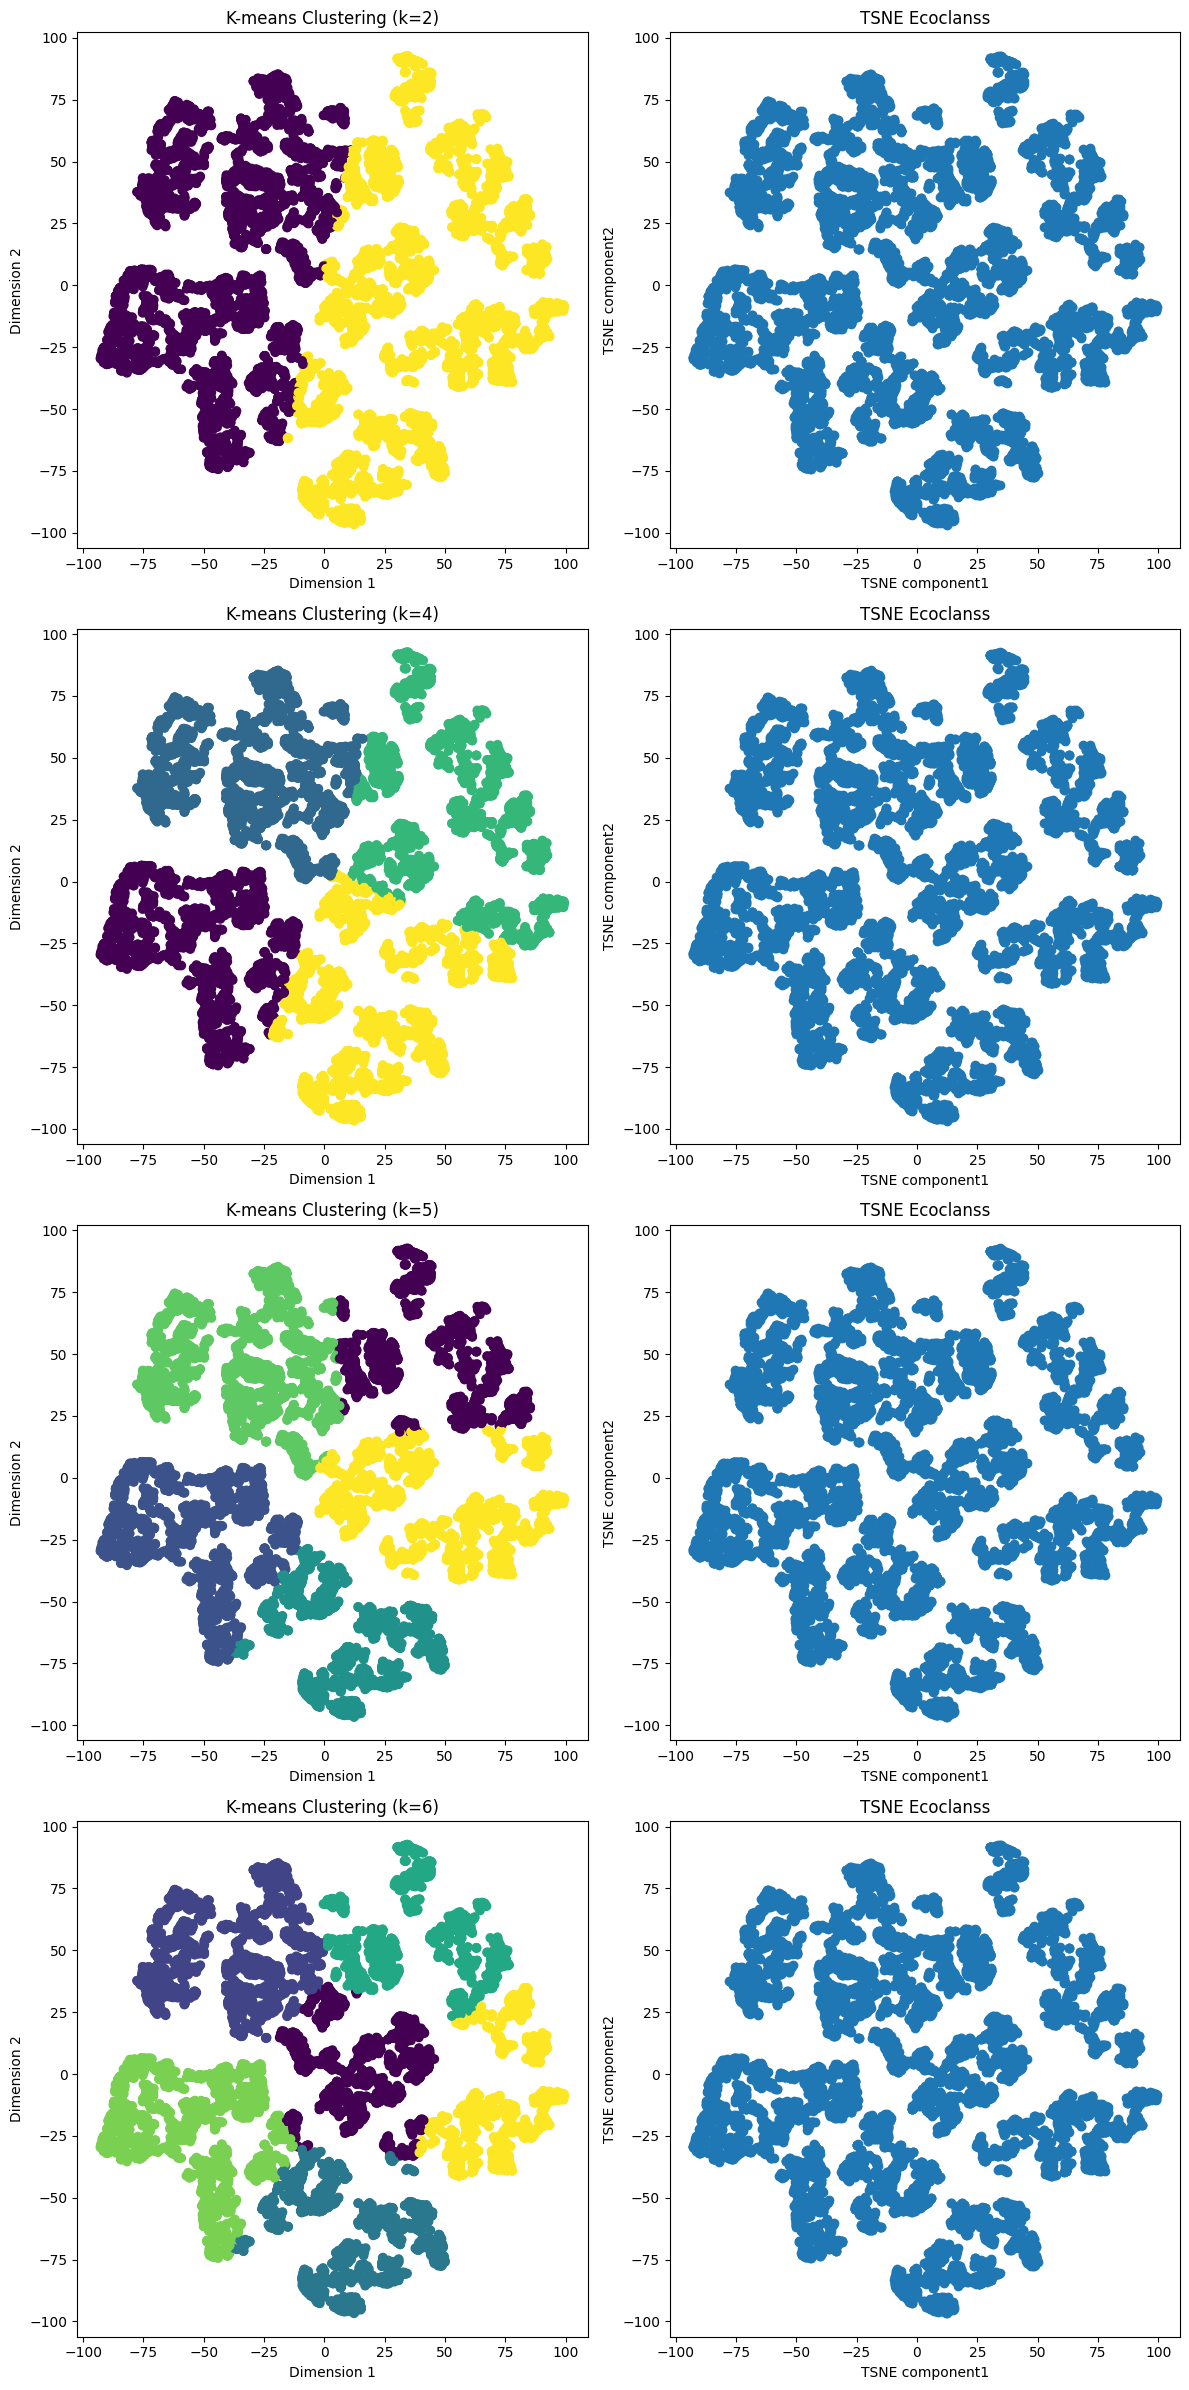

In [30]:
# ハイパーパラメータの候補リスト
k_values = [2, 4, 5, 6]  # k-meansのクラスタ数の候補

# サブプロットの設定
fig, axes = plt.subplots(len(k_values), 2, figsize=(12, 6 * (len(k_values) )))

# k-meansのクラスタリング
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, max_iter=100)
    eco_kmeans = kmeans.fit_predict(eco_tsne)
    
    # 左側のグラフ
    axes[i, 0].scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=eco_kmeans)
    axes[i, 0].set_title(f'K-means Clustering (k={k})')
    axes[i, 0].set_xlabel('Dimension 1')
    axes[i, 0].set_ylabel('Dimension 2')

# 右側のグラフ
    axes[i,1].scatter(eco_tsne[:,0],eco_tsne[:,1])
    axes[i,1].set_xlabel('TSNE component1')
    axes[i,1].set_ylabel('TSNE component2')
    axes[i,1].set_title('TSNE Ecoclanss')
    
#図を表示
plt.tight_layout()
plt.show()


/usr/local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


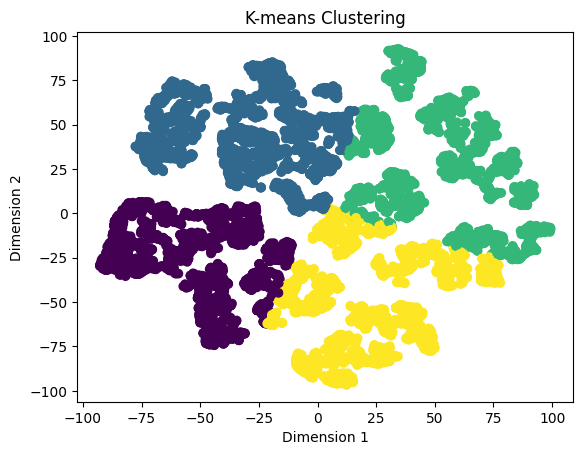

In [30]:
kmeans = KMeans(n_clusters=4, max_iter=300)
eco_kmeans = kmeans.fit_predict(eco_tsne)

plt.scatter(eco_tsne[:, 0], eco_tsne[:, 1], c=eco_kmeans)
plt.title('K-means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [31]:
# クラスタリング結果を元のデータフレームに追加
df_Eco_enc['Cluster_kmeans'] = eco_kmeans

#df_Eco_enc = df_Eco_enc.drop('Cluster', axis=1)

In [32]:
df_Eco_enc.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Cluster_kmeans
0,69,546,2,5,2,4,3,4,5,4,...,4,4,4,2,0,0.0,0,0,1,1
1,31,842,3,5,3,1,1,3,1,1,...,5,5,4,1,35,16.0,1,0,1,0


In [33]:
df_Eco_enc['Cluster_kmeans']

0        1
1        0
2        1
3        2
4        1
        ..
11495    0
11496    0
11497    3
11498    1
11499    1
Name: Cluster_kmeans, Length: 11500, dtype: int32

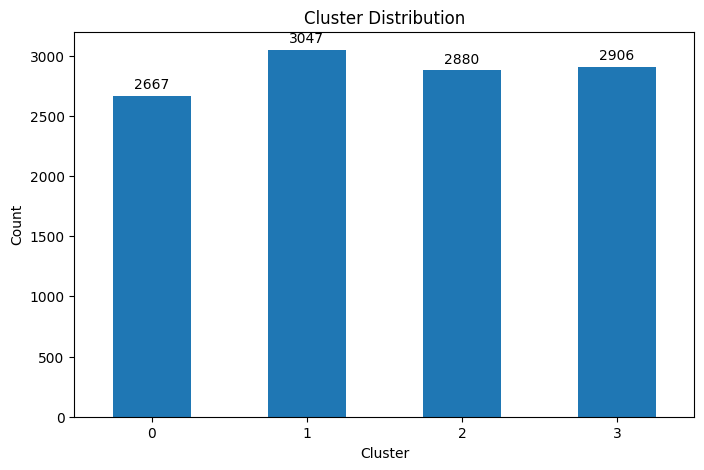

In [34]:
# クラスターごとのカウントを計算
cluster_counts = df_Eco_enc['Cluster_kmeans'].value_counts().sort_index()

# グラフの作成
fig, ax = plt.subplots(figsize=(8, 5))
cluster_counts.plot(kind='bar', ax=ax)

# グラフのラベルとタイトルを設定
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Cluster Distribution')

# 各バーの上に数値を表示
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', (bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# x軸の数値を90度回転させる
ax.tick_params(axis='x', rotation=0)

plt.show()

In [35]:
df_Eco_enc['satisfaction'] = df_Eco.reset_index(drop=True)['satisfaction']

In [36]:
df_Eco_enc.head(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Cluster_kmeans,satisfaction
0,69,546,2,5,2,4,3,4,5,4,...,4,4,2,0,0.0,0,0,1,1,neutral or dissatisfied
1,31,842,3,5,3,1,1,3,1,1,...,5,4,1,35,16.0,1,0,1,0,neutral or dissatisfied


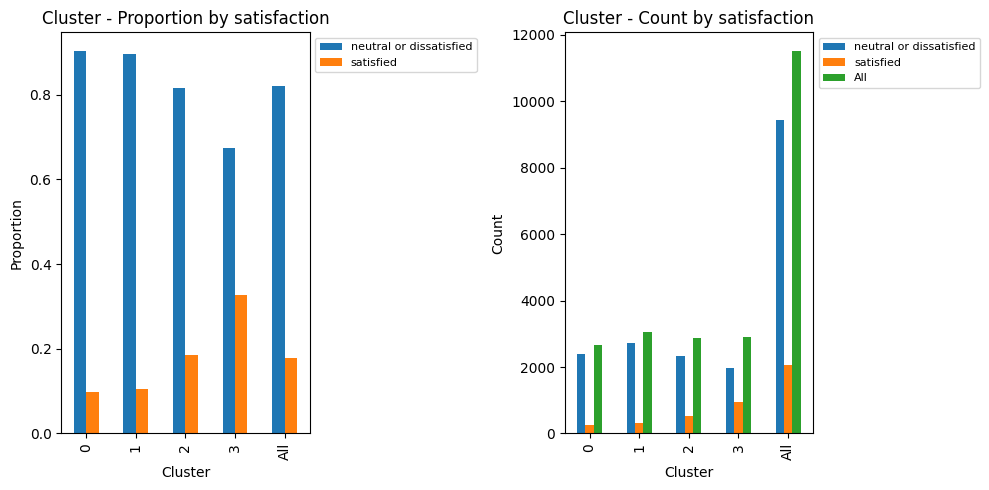

In [37]:
# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['satisfaction'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by satisfaction')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab( df_Eco_enc['Cluster_kmeans'],  df_Eco_enc['satisfaction'], margins=True)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by satisfaction')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


## 3Dしてクラスタ確認

In [197]:
#T-sneで次元削減
tsne_3d = TSNE(n_components=3)
eco_tsne_3d = tsne_3d.fit_transform(df_Eco_enc_std)

In [198]:
from mpl_toolkits.mplot3d import Axes3D

In [199]:
df_Eco_enc

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Cluster_kmeans,satisfaction,decade,Flight Distance_bins,Departure Delay in Minutes_bins,Arrival Delay in Minutes_bins
0,69,546,2,5,2,4,3,4,5,4,...,0.0,0,0,1,1,neutral or dissatisfied,60s,"(500, 1000]",NaN,NaN
1,31,842,3,5,3,1,1,3,1,1,...,16.0,1,0,1,0,neutral or dissatisfied,30s,"(500, 1000]","(0.0, 100.0]","(0.0, 100.0]"
2,62,1372,3,4,2,2,3,4,4,1,...,0.0,0,0,1,1,neutral or dissatisfied,60s,"(1000, 1500]",NaN,NaN
3,41,1771,3,3,3,3,2,3,2,2,...,23.0,0,1,0,2,neutral or dissatisfied,40s,"(1500, 2000]","(0.0, 100.0]","(0.0, 100.0]"
4,18,937,2,5,2,2,1,2,1,1,...,0.0,0,0,1,1,neutral or dissatisfied,10s,"(500, 1000]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,26,1055,2,4,3,1,3,3,3,3,...,0.0,1,0,1,0,neutral or dissatisfied,20s,"(1000, 1500]",NaN,NaN
11496,60,1400,2,5,2,3,2,4,4,4,...,160.0,1,0,1,0,neutral or dissatisfied,60s,"(1000, 1500]","(100.0, 200.0]","(100.0, 200.0]"
11497,36,1546,2,5,1,5,2,2,2,2,...,0.0,1,0,0,3,neutral or dissatisfied,30s,"(1500, 2000]",NaN,NaN
11498,25,240,3,4,3,3,3,3,3,3,...,8.0,0,0,1,1,neutral or dissatisfied,20s,"(0, 500]",NaN,"(0.0, 100.0]"


In [200]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# プロット設定
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# データのプロット
satisfaction = df_Eco_enc['Cluster_kmeans']
satisfaction_mapped = np.arange(len(satisfaction))  # 数値にマッピング
scatter = ax.scatter(eco_tsne_3d[:, 0], eco_tsne_3d[:, 1], eco_tsne_3d[:, 2], c=satisfaction_mapped, cmap='viridis')

# カラーバーの設定
cbar = plt.colorbar(scatter)
cbar.set_label('Satisfaction')

# 軸ラベルの設定
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# グラフの表示
plt.show()

<IPython.core.display.Javascript object>

In [191]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [192]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

#描画エリアの作成
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

#numpyを使ってXYZの値を設定
x = np.random.rand(200,1) 
y = np.random.rand(200,1)
z = np.random.rand(200,1)

#散布図の作成
ax.scatter(x,y,z,s=40,c="red")

#描画
plt.show()

<IPython.core.display.Javascript object>

In [202]:

ax = fig.add_subplot(projection='3d')

In [203]:
fig = plt.figure()


<IPython.core.display.Javascript object>

## クラスター数値要約

In [114]:
df_Eco_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11500 non-null  int64  
 1   Flight Distance                    11500 non-null  int64  
 2   Inflight wifi service              11500 non-null  int64  
 3   Departure/Arrival time convenient  11500 non-null  int64  
 4   Ease of Online booking             11500 non-null  int64  
 5   Gate location                      11500 non-null  int64  
 6   Food and drink                     11500 non-null  int64  
 7   Online boarding                    11500 non-null  int64  
 8   Seat comfort                       11500 non-null  int64  
 9   Inflight entertainment             11500 non-null  int64  
 10  On-board service                   11500 non-null  int64  
 11  Leg room service                   11500 non-null  int

## クラスター分布

### Flight Distance

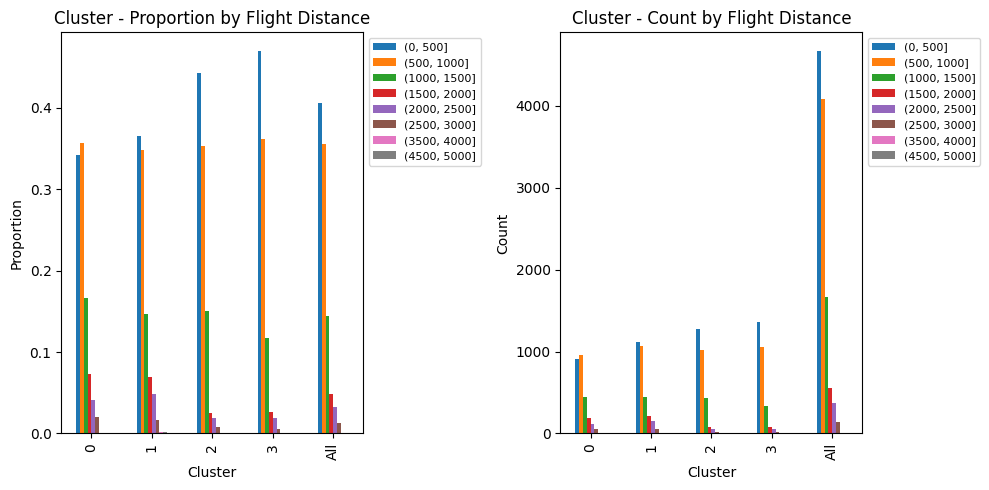

In [115]:
# Flight Distanceを500ごとのビンに分割
df_Eco_enc['Flight Distance_bins'] = pd.cut(df_Eco_enc['Flight Distance'], bins=range(0, df_Eco_enc['Flight Distance'].max() + 500, 500))

# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Flight Distance_bins'], margins=True, normalize="index")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Flight Distance')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Flight Distance_bins'], margins=True)
cross_counts = cross_counts.drop("All", axis=1)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Flight Distance')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


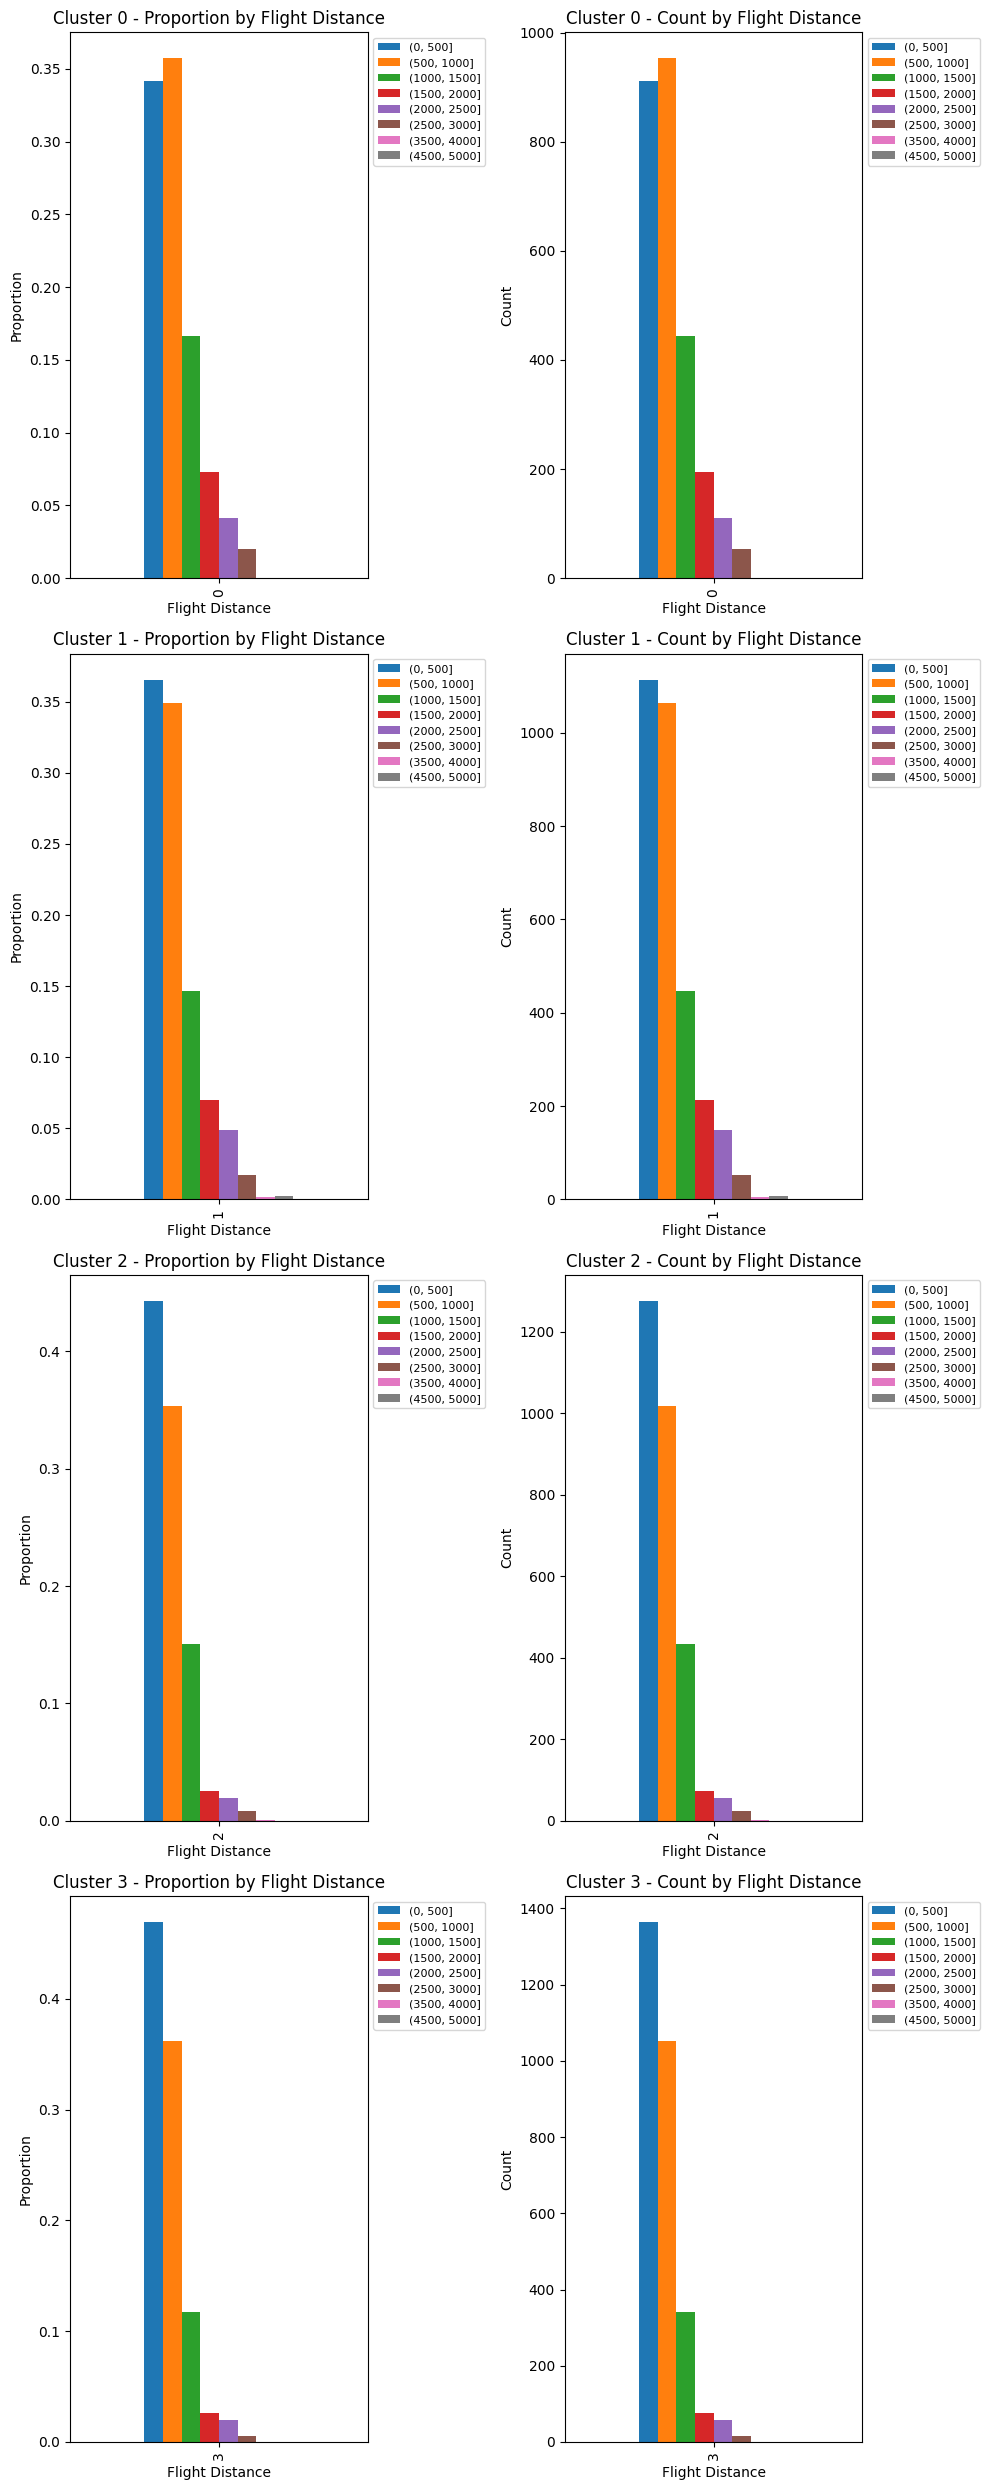

In [116]:
# Flight Distanceを500ごとのビンに分割
Eco_enc_df['Flight Distance_bins'] = pd.cut(Eco_enc_df['Flight Distance'], bins=range(0, Eco_enc_df['Flight Distance'].max() + 500, 500))

# 各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Flight Distance_bins'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Flight Distance')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Flight Distance')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Flight Distance')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Flight Distance')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### satisfaction

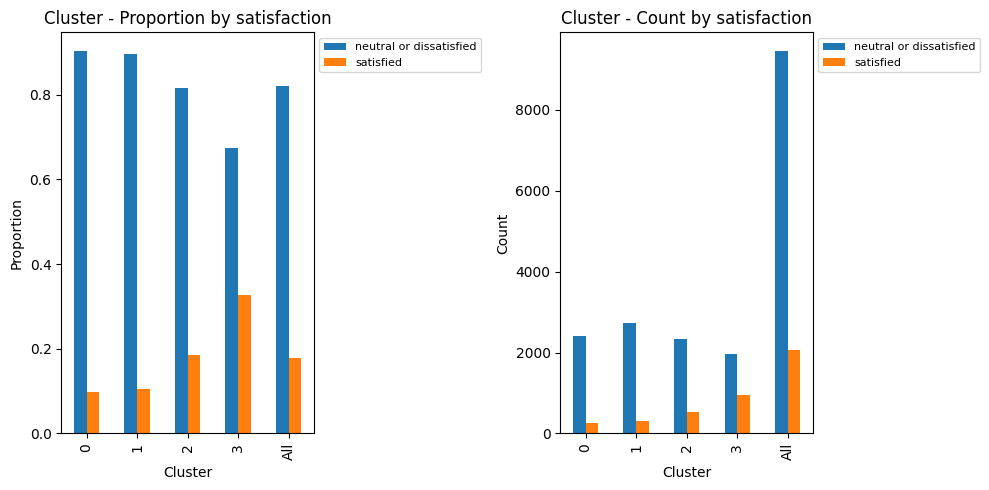

In [112]:
# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['satisfaction'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by satisfaction')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab( df_Eco_enc['Cluster_kmeans'],  df_Eco_enc['satisfaction'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by satisfaction')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Inflight wifi service

In [94]:
cross_counts

Inflight wifi service,0,1,2,3,4,5,All
Cluster_kmeans,,,,,,,
0,49,480,770,838,412,118,2667
1,57,548,909,947,465,121,3047
2,63,522,763,785,555,192,2880
3,55,351,681,735,714,370,2906
All,224,1901,3123,3305,2146,801,11500


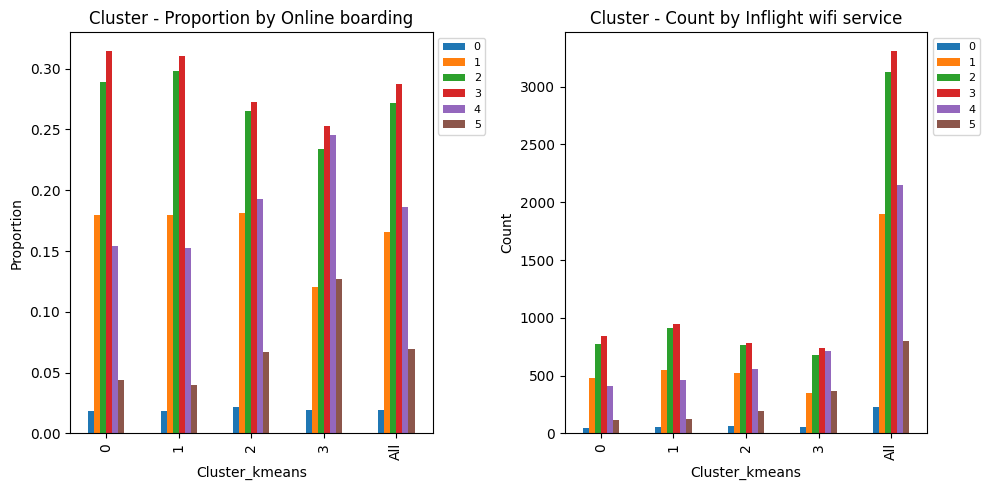

In [95]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight wifi service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
'''cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight wifi service'], margins=True)
#cross_counts = cross_counts.drop("ALL", axis=1)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})
'''

cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight wifi service'], margins=True)
cross_counts = cross_counts.drop("All", axis=1)  # "All"列を削除

cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Inflight wifi service')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


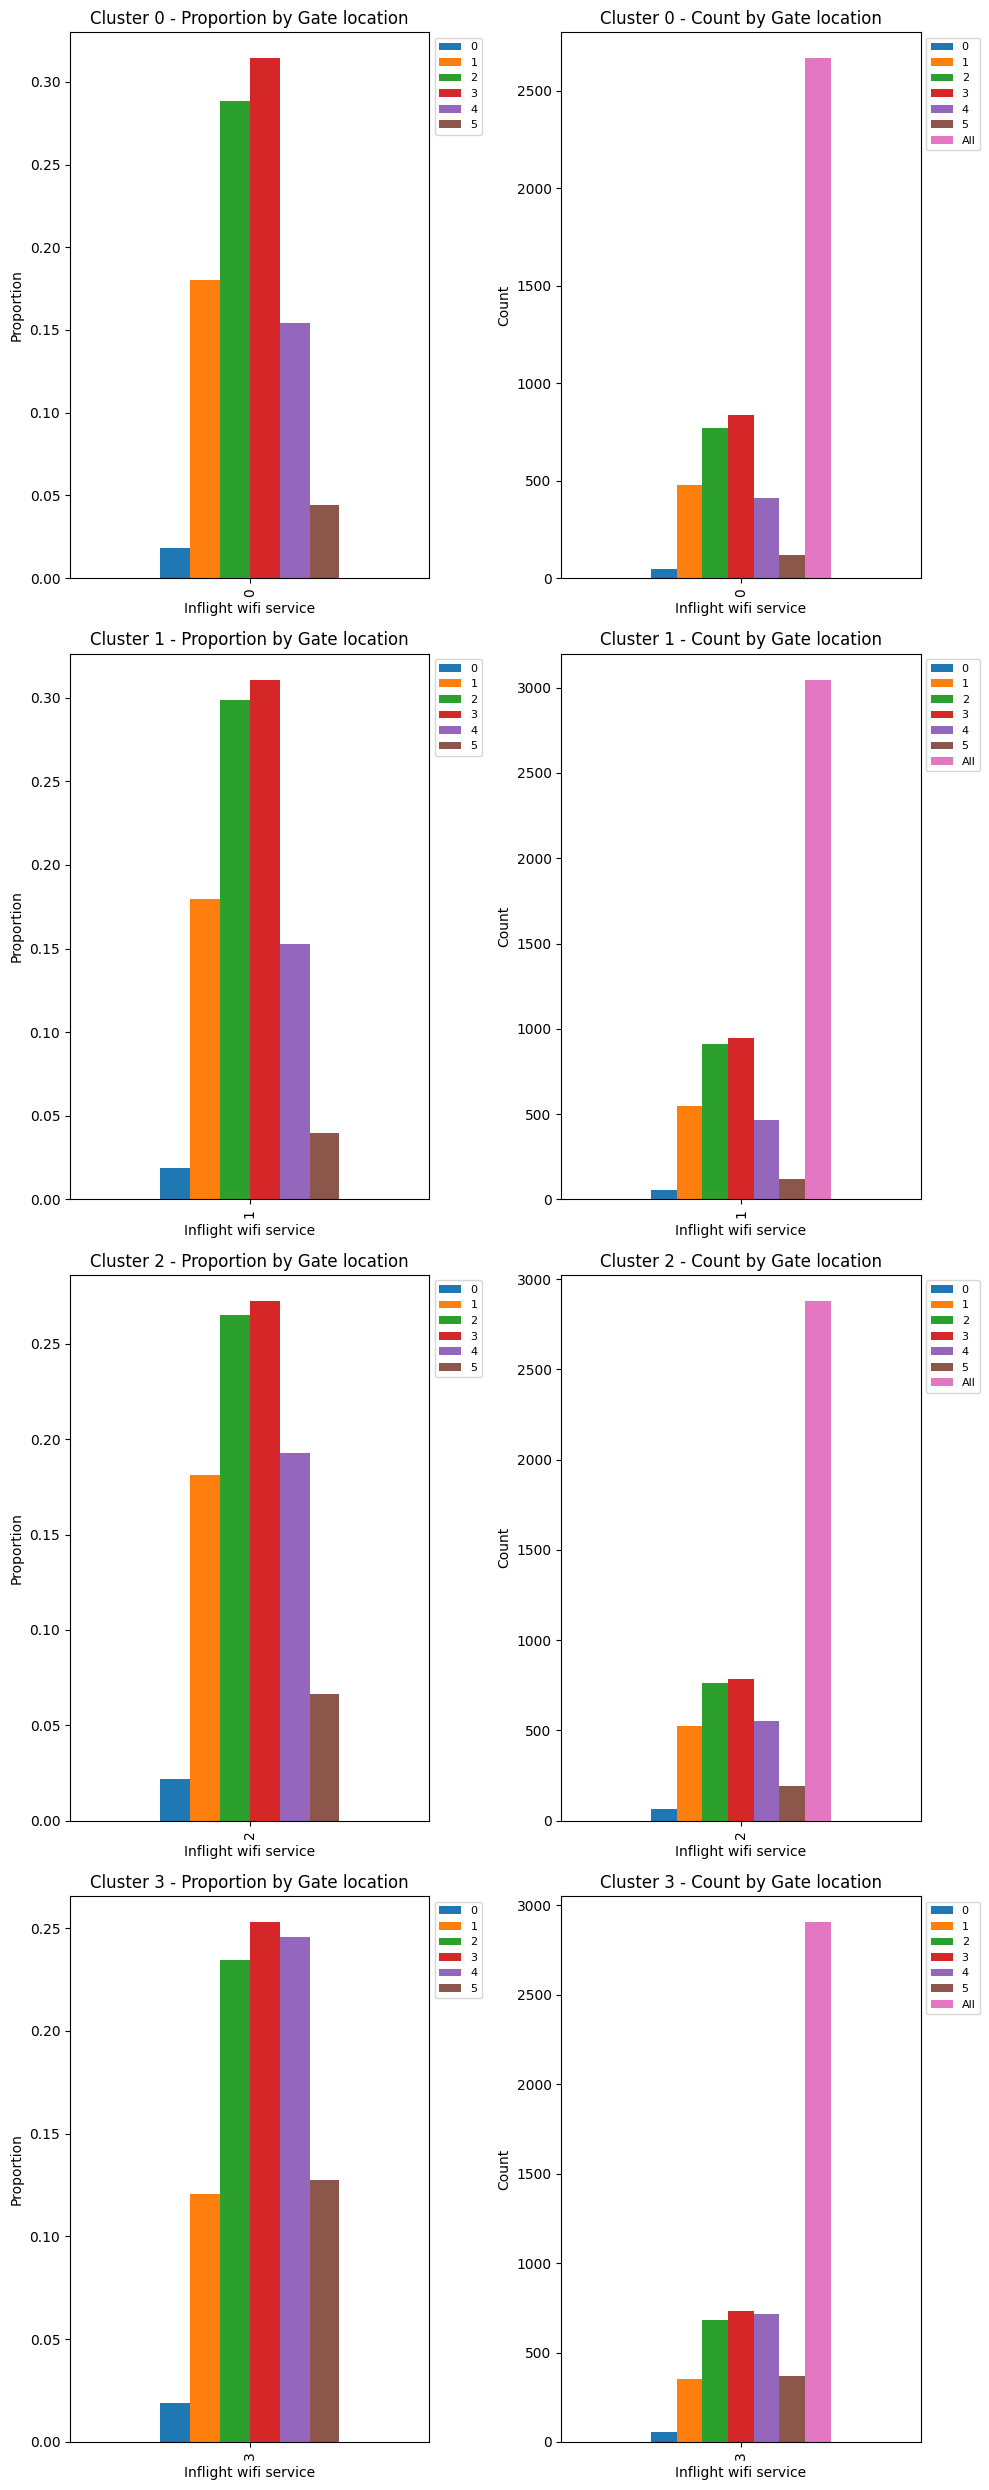

In [70]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight wifi service'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Inflight wifi service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Gate location')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Inflight wifi service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Gate location')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

### Ease of Online booking

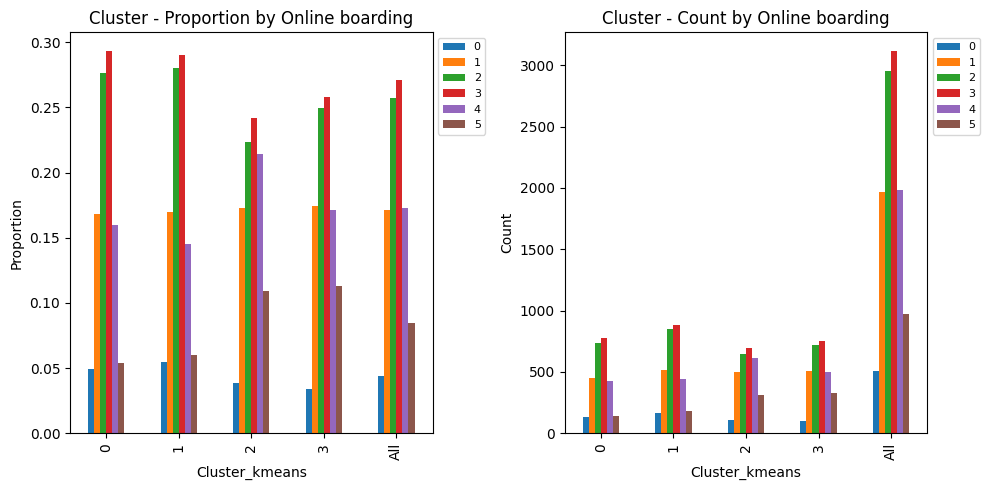

In [100]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Ease of Online booking'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Ease of Online booking'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Gate location

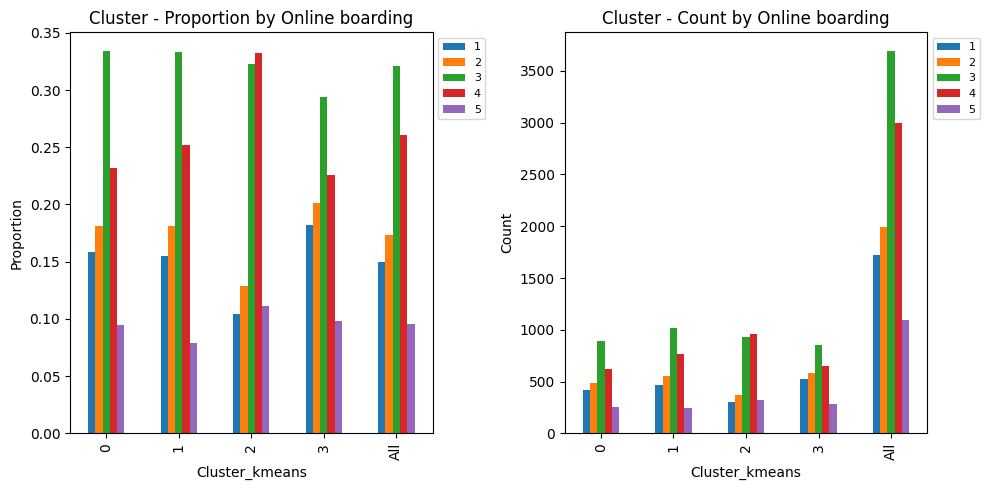

In [101]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Gate location'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Gate location'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Food and drink

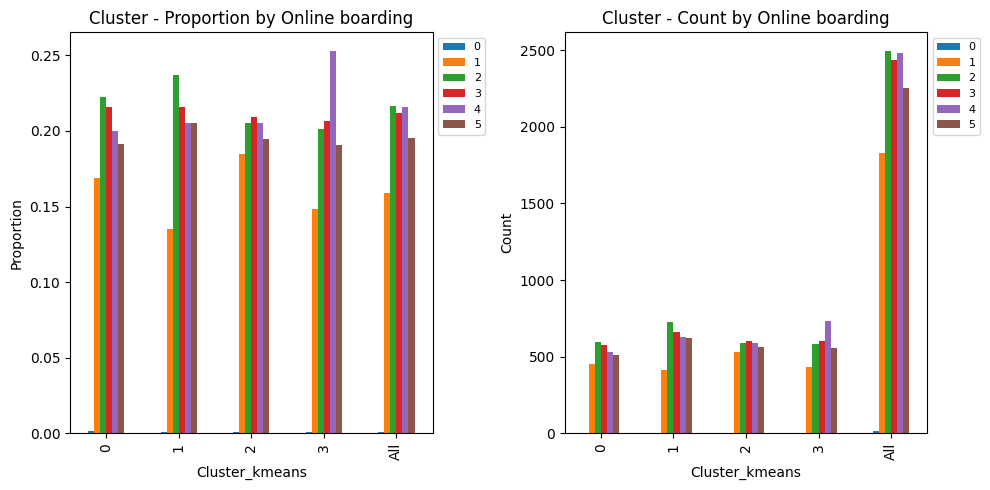

In [102]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Food and drink'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Food and drink'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Online boarding	

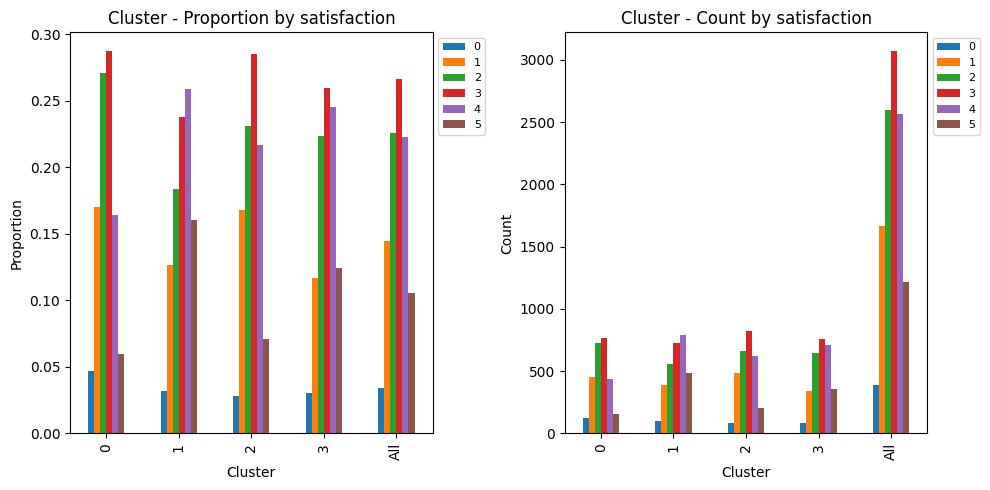

In [103]:
# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Online boarding'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by satisfaction')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab( df_Eco_enc['Cluster_kmeans'],  df_Eco_enc['Online boarding'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by satisfaction')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Seat comfort

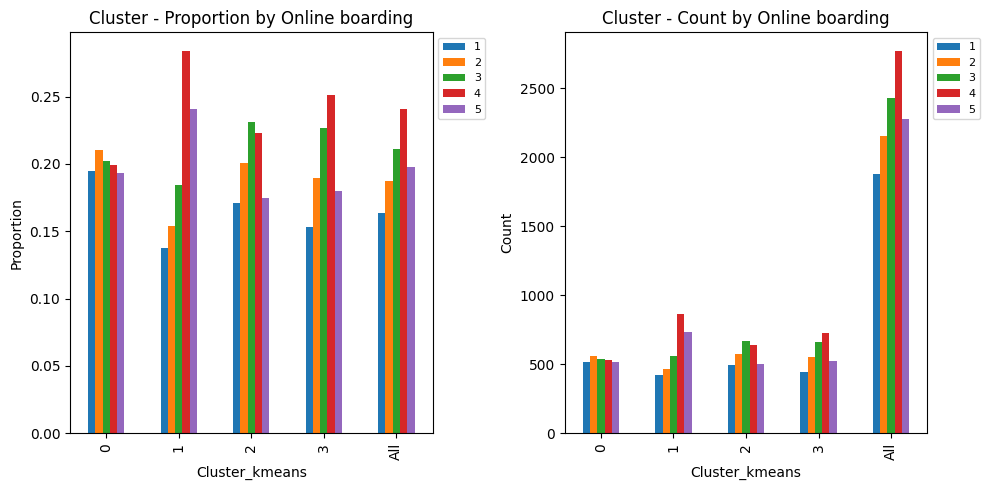

In [104]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Seat comfort'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Seat comfort'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Inflight entertainment

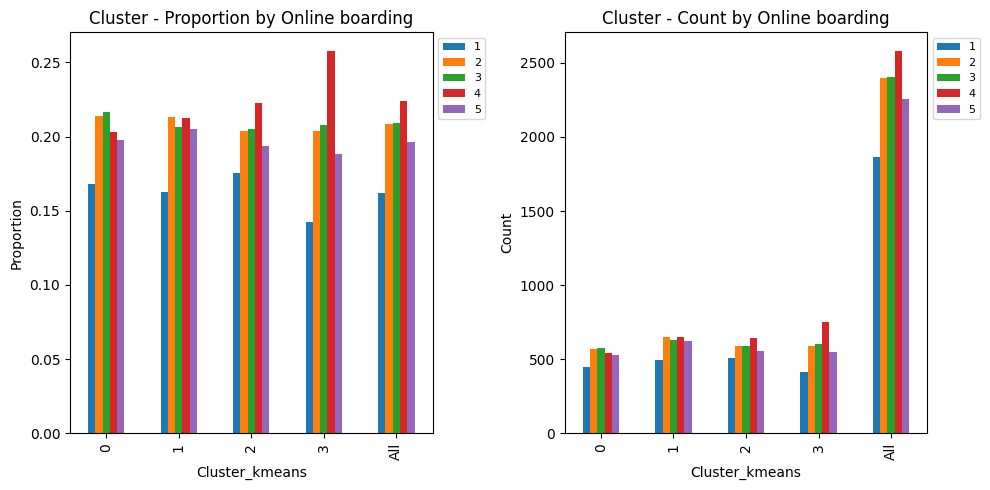

In [105]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight entertainment'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight entertainment'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### On-board service

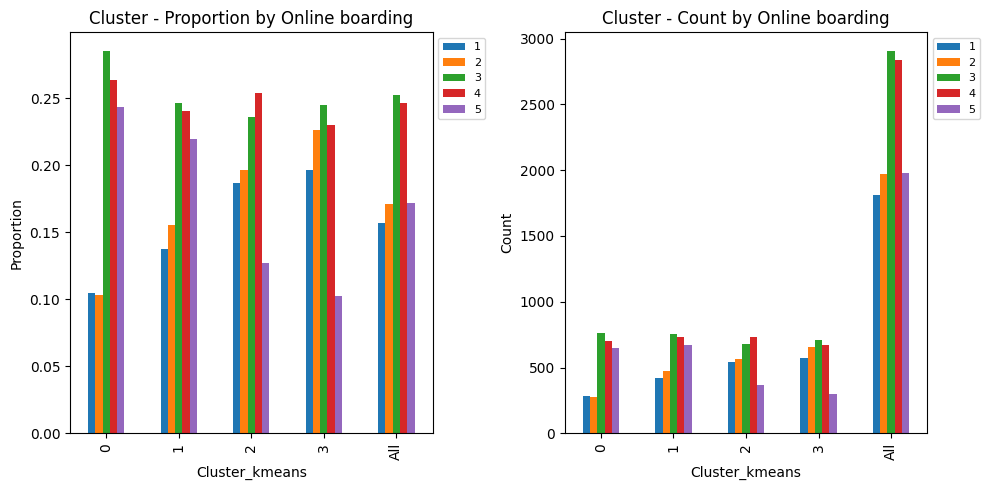

In [106]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['On-board service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['On-board service'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Leg room service

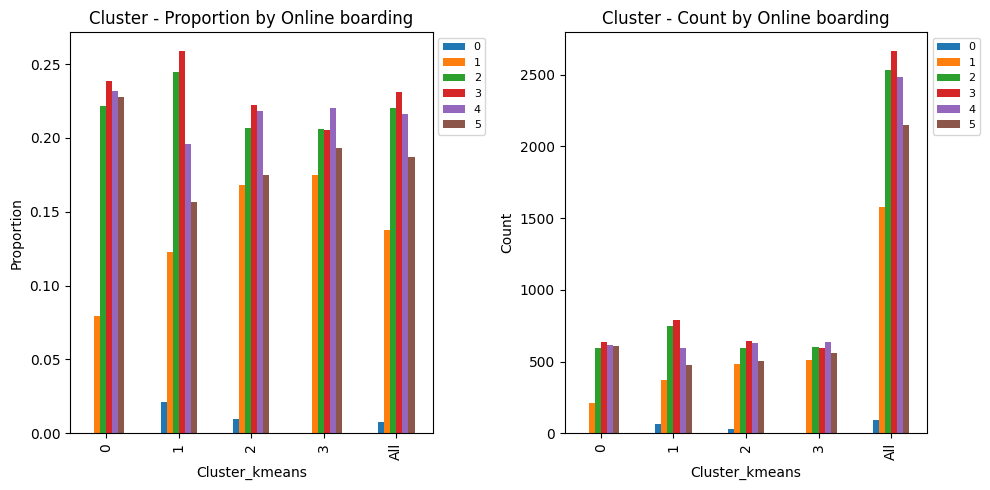

In [107]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Leg room service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Leg room service'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Baggage handling

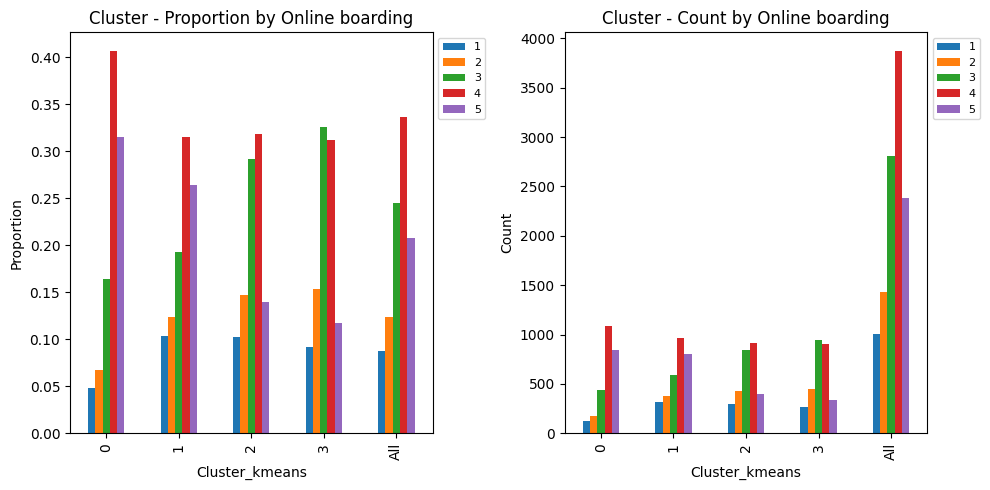

In [108]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Baggage handling'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Baggage handling'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Checkin service

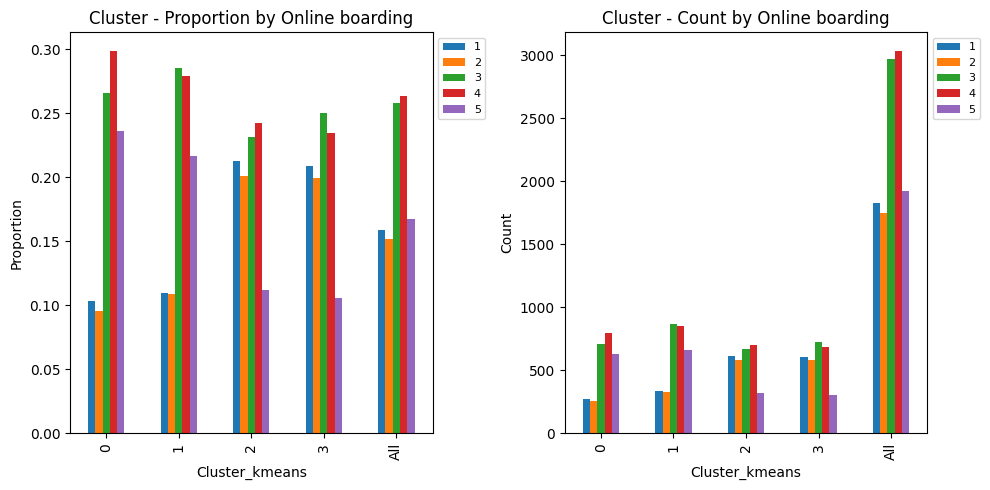

In [109]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Checkin service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Checkin service'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Inflight service

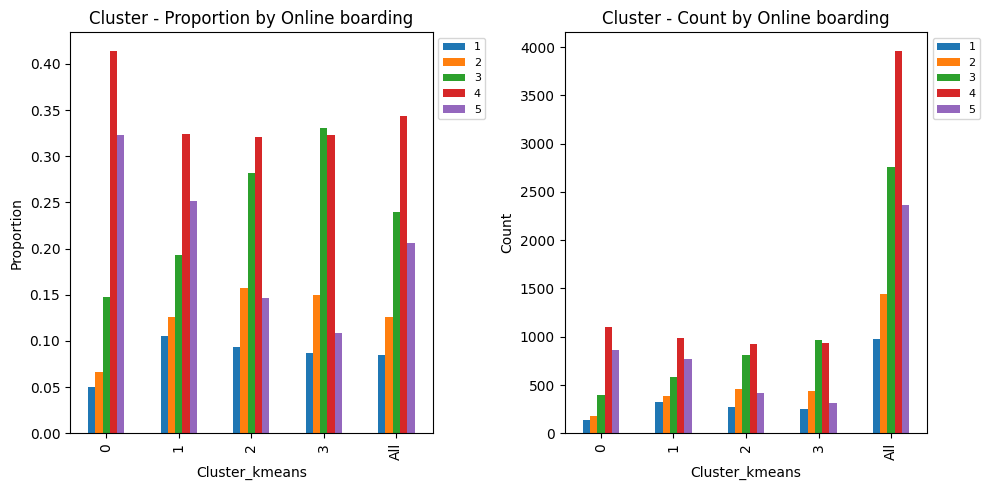

In [110]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight service'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Inflight service'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Cleanliness

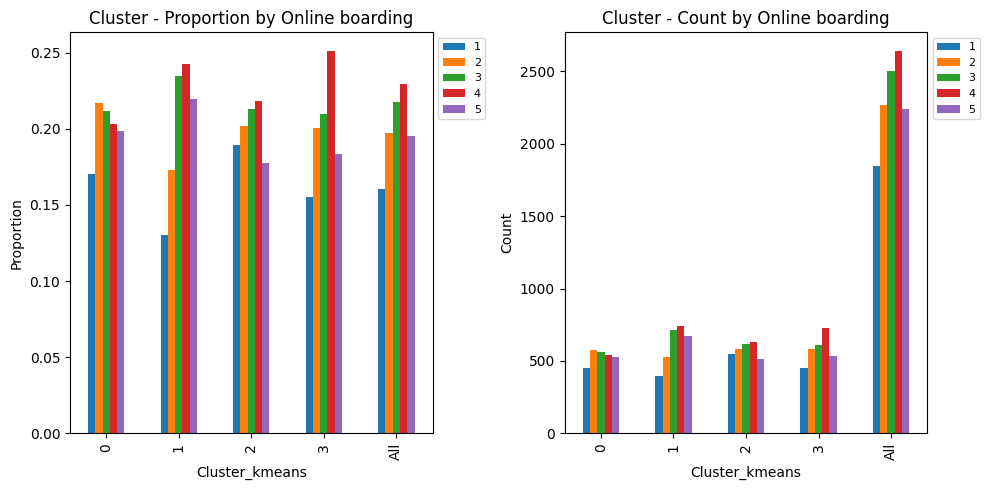

In [111]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Cleanliness'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['Cleanliness'], margins=True)
cross_counts = cross_counts.drop("All", axis=1) 
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Departure Delay in Minutes

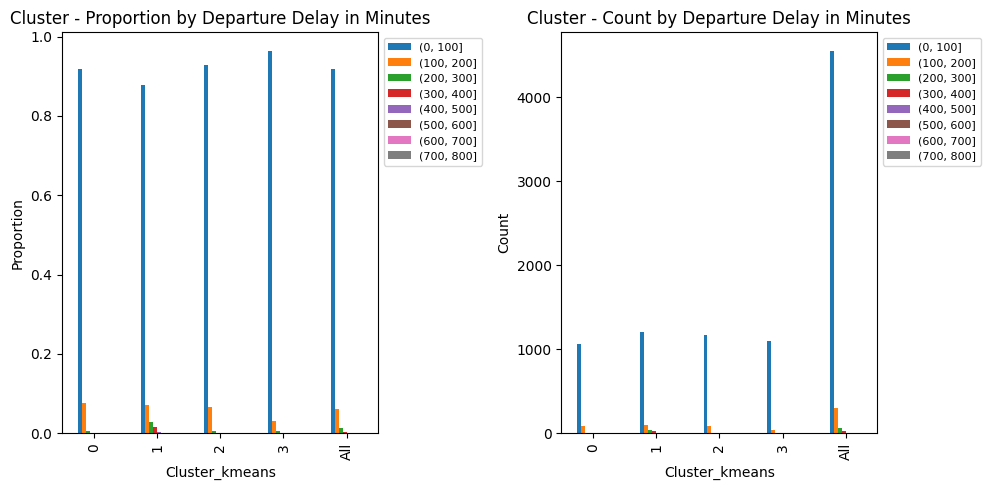

In [120]:
# Departure Delay in Minutesを30ごとのビンに分割
df_Eco_enc['Departure Delay in Minutes_bins'] = pd.cut(df_Eco_enc['Departure Delay in Minutes'], bins=range(0, df_Eco_enc['Departure Delay in Minutes'].max() + 100, 100))

# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Departure Delay in Minutes_bins'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster - Proportion by Departure Delay in Minutes')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Departure Delay in Minutes_bins'], margins=True)
cross_counts = cross_counts.drop("All", axis=1)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster - Count by Departure Delay in Minutes')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Arrival Delay in Minutes

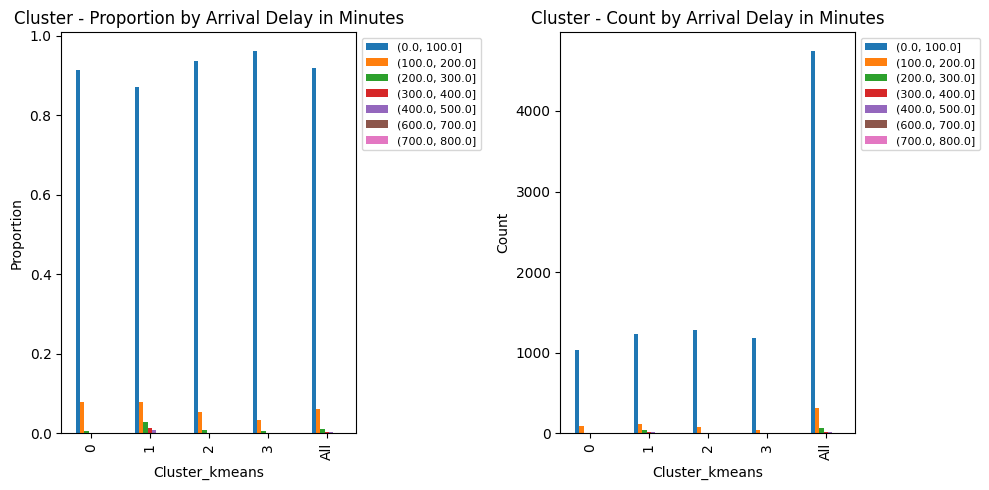

In [122]:
# Arrival Delay in Minutesを100ごとのビンに分割
df_Eco_enc['Arrival Delay in Minutes_bins'] = pd.cut(df_Eco_enc['Arrival Delay in Minutes'], bins=np.arange(0, df_Eco_enc['Arrival Delay in Minutes'].max() + 100, 100))

# クラスターごとの分布
cross = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Arrival Delay in Minutes_bins'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title('Cluster - Proportion by Arrival Delay in Minutes')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(df_Eco_enc['Cluster_kmeans'], df_Eco_enc['Arrival Delay in Minutes_bins'], margins=True)
cross_counts = cross_counts.drop("All", axis=1)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title('Cluster - Count by Arrival Delay in Minutes')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


### Decade

In [87]:
#年齢別
Eco_enc_df['decade'] =Eco_enc_df['Age'].astype('str').apply(lambda x:x[0][0]).apply(lambda x: x+ '0s')
Eco_enc_df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Cluster_kmeans,satisfaction,decade
0,69,546,2,5,2,4,3,4,5,4,...,4,2,0,0.0,0,0,1,1,neutral or dissatisfied,60s
1,31,842,3,5,3,1,1,3,1,1,...,4,1,35,16.0,1,0,1,0,neutral or dissatisfied,30s
2,62,1372,3,4,2,2,3,4,4,1,...,1,4,0,0.0,0,0,1,1,neutral or dissatisfied,60s
3,41,1771,3,3,3,3,2,3,2,2,...,4,2,20,23.0,0,1,0,2,neutral or dissatisfied,40s
4,18,937,2,5,2,2,1,2,1,1,...,1,1,0,0.0,0,0,1,1,neutral or dissatisfied,10s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,26,1055,2,4,3,1,3,3,3,3,...,5,3,0,0.0,1,0,1,0,neutral or dissatisfied,20s
11496,60,1400,2,5,2,3,2,4,4,4,...,3,4,188,160.0,1,0,1,0,neutral or dissatisfied,60s
11497,36,1546,2,5,1,5,2,2,2,2,...,3,2,0,0.0,1,0,0,3,neutral or dissatisfied,30s
11498,25,240,3,4,3,3,3,3,3,3,...,4,3,0,8.0,0,0,1,1,neutral or dissatisfied,20s


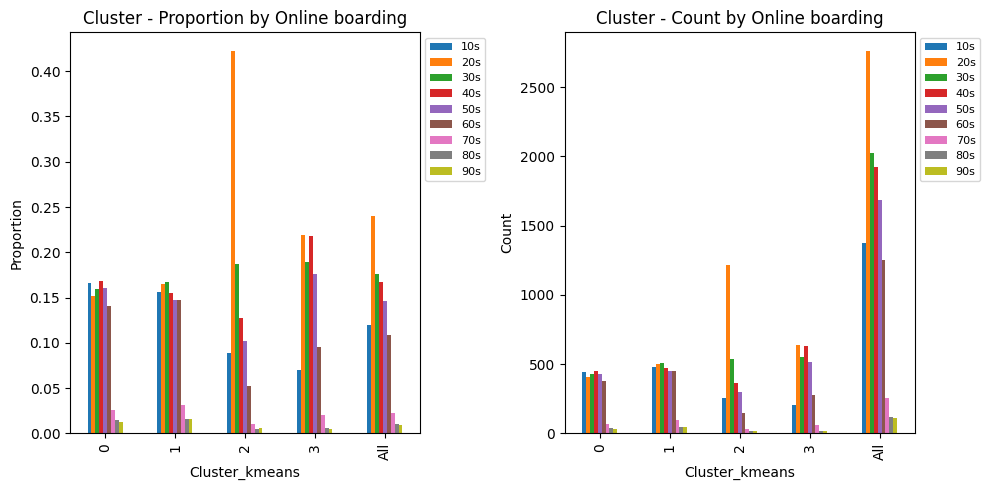

In [124]:
# クラスターごとの分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['decade'], margins=True, normalize="index")
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 左側のグラフ
cross.plot(kind="bar", ax=axes[0])
axes[0].set_xlabel('Cluster_kmeans')
axes[0].set_ylabel('Proportion')
axes[0].set_title(f'Cluster - Proportion by Online boarding')
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

# 右側のグラフ
cross_counts = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['decade'], margins=True)
cross_counts = cross_counts.drop("All", axis=1)
cross_counts.plot(kind="bar", ax=axes[1])
axes[1].set_xlabel('Cluster_kmeans')
axes[1].set_ylabel('Count')
axes[1].set_title(f'Cluster - Count by Online boarding')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()


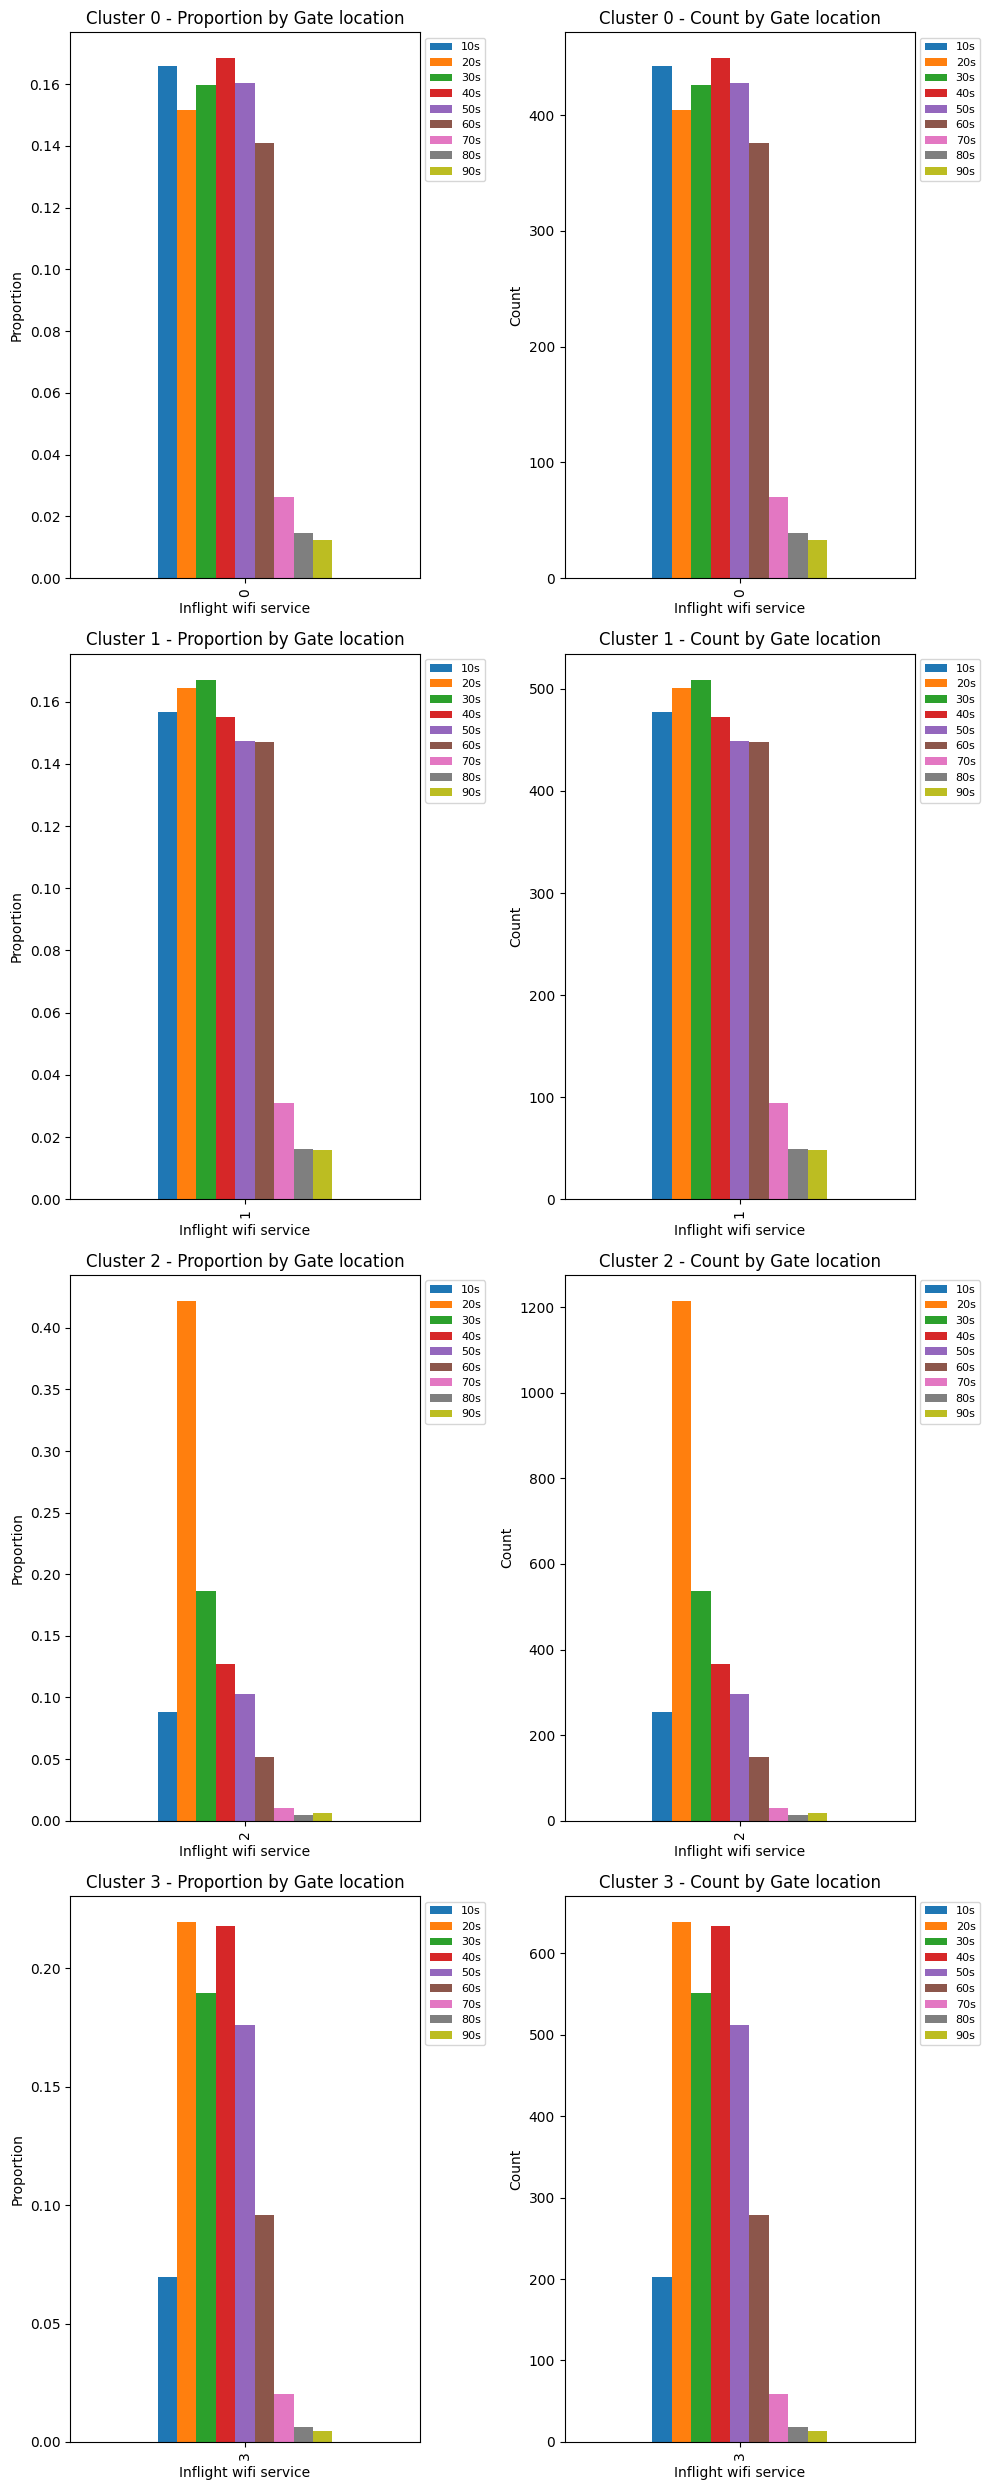

In [126]:
#各クラスターごとの年齢分布
cross = pd.crosstab(Eco_enc_df['Cluster_kmeans'], Eco_enc_df['decade'], margins=True, normalize="index")
fig, axes = plt.subplots(4, 2, figsize=(10, 25))

for cluster in range(4):
    # クラスターごとの情報のみ抽出
    cluster_data = cross.loc[[cluster], :]
    cluster_counts = cross_counts.loc[[cluster], :]

    # 左側のグラフ　　割合
    cluster_data.plot(kind="bar", ax=axes[cluster, 0])
    axes[cluster, 0].set_xlabel('Inflight wifi service')
    axes[cluster, 0].set_ylabel('Proportion')
    axes[cluster, 0].set_title(f'Cluster {cluster} - Proportion by Gate location')
    axes[cluster, 0].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

    # 右側のグラフ　数値
    cluster_counts.plot(kind="bar", ax=axes[cluster, 1])
    axes[cluster, 1].set_xlabel('Inflight wifi service')
    axes[cluster, 1].set_ylabel('Count')
    axes[cluster, 1].set_title(f'Cluster {cluster} - Count by Gate location')
    axes[cluster, 1].legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

plt.tight_layout()
plt.show()

In [134]:
Eco_enc_df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Cluster_kmeans', 'satisfaction',
       'decade', 'Flight Distance_bins', 'Departure Delay in Minutes_bins',
       'Arrival Delay in Minutes_bins'],
      dtype='object')

In [136]:
Eco_enc_df_0 = Eco_enc_df.query('Cluster_kmeans == 0')

In [137]:
Eco_enc_df_1 = Eco_enc_df.query('Cluster_kmeans == 1')

In [138]:
Eco_enc_df_2 = Eco_enc_df.query('Cluster_kmeans == 2')

In [139]:
Eco_enc_df_3 = Eco_enc_df.query('Cluster_kmeans == 3')

In [143]:
Eco_enc_df_0

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Cluster_kmeans,satisfaction,decade,Flight Distance_bins,Departure Delay in Minutes_bins,Arrival Delay in Minutes_bins
1,31,842,3,5,3,1,1,3,1,1,...,16.0,1,0,1,0,neutral or dissatisfied,30s,"(500, 1000]","(0.0, 100.0]","(0.0, 100.0]"
6,54,201,5,4,5,3,2,5,2,2,...,0.0,1,0,1,0,satisfied,50s,"(0, 500]","(0.0, 100.0]",NaN
8,53,954,2,5,2,5,5,2,5,5,...,8.0,1,0,1,0,neutral or dissatisfied,50s,"(500, 1000]",NaN,"(0.0, 100.0]"
10,62,1189,2,4,2,3,2,2,2,2,...,0.0,1,0,1,0,neutral or dissatisfied,60s,"(1000, 1500]",NaN,NaN
16,67,2419,2,4,2,2,2,4,4,3,...,53.0,1,0,1,0,neutral or dissatisfied,60s,"(2000, 2500]","(0.0, 100.0]","(0.0, 100.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488,59,674,3,4,3,3,5,3,5,5,...,26.0,1,0,1,0,neutral or dissatisfied,50s,"(500, 1000]","(0.0, 100.0]","(0.0, 100.0]"
11489,8,517,1,5,1,2,5,1,5,5,...,27.0,1,0,1,0,neutral or dissatisfied,80s,"(500, 1000]","(0.0, 100.0]","(0.0, 100.0]"
11492,15,325,2,4,2,2,2,2,5,2,...,0.0,1,0,1,0,neutral or dissatisfied,10s,"(0, 500]",NaN,NaN
11495,26,1055,2,4,3,1,3,3,3,3,...,0.0,1,0,1,0,neutral or dissatisfied,20s,"(1000, 1500]",NaN,NaN


In [164]:
Eco_enc_df_dis0 = Eco_enc_df_0[Eco_enc_df_0['satisfaction']=='neutral or dissatisfied']

In [165]:
Eco_enc_df_dis1 = Eco_enc_df_1[Eco_enc_df_1['satisfaction']=='neutral or dissatisfied']

In [166]:
Eco_enc_df_dis2 = Eco_enc_df_2[Eco_enc_df_2['satisfaction']=='neutral or dissatisfied']

In [167]:
Eco_enc_df_dis3 = Eco_enc_df_3[Eco_enc_df_3['satisfaction']=='neutral or dissatisfied']

In [177]:
import matplotlib.pyplot as plt

# 年代の順序を指定
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

for i in range(3):
    counts = Eco_enc_df_dis[i]['decade'].value_counts().reindex(decade_order)
    plt.bar(x=counts.index, height=counts.values)
    plt.xlabel('Decade')
    plt.ylabel('Count')
    plt.title(f'Distribution of Decade - Dataset {i}')
    plt.show()


NameError: name 'Eco_enc_df_dis' is not defined

In [178]:
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

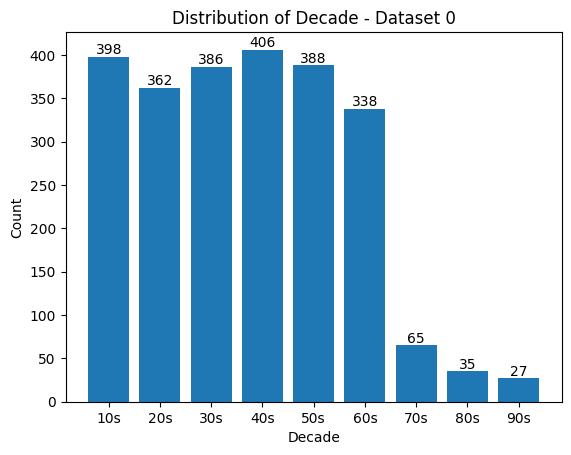

In [186]:
import matplotlib.pyplot as plt

# 年代の順序を指定
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

counts = Eco_enc_df_dis0['decade'].value_counts().reindex(decade_order)
plt.bar(x=counts.index, height=counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Decade - Dataset 0')

# 数値を表示
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


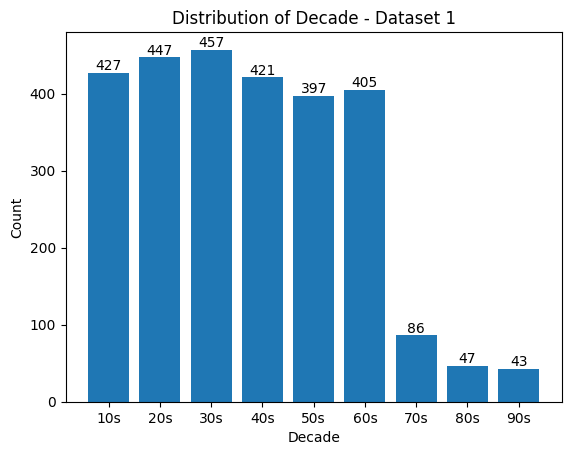

In [185]:
import matplotlib.pyplot as plt

# 年代の順序を指定
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

counts = Eco_enc_df_dis1['decade'].value_counts().reindex(decade_order)
plt.bar(x=counts.index, height=counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Decade - Dataset 1')

# 数値を表示
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [ ]:
Eco_enc_df_dis2['decade']

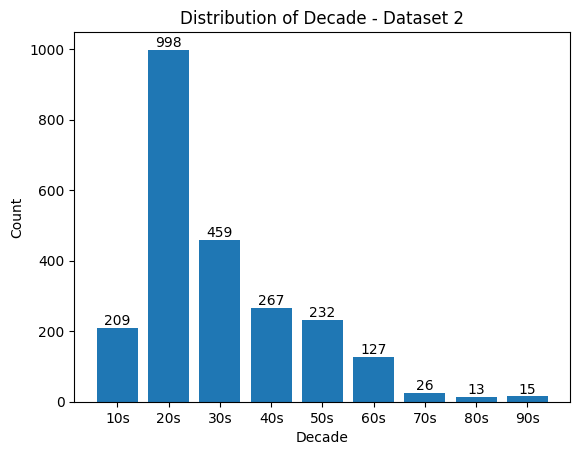

In [183]:
import matplotlib.pyplot as plt

# 年代の順序を指定
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

counts = Eco_enc_df_dis2['decade'].value_counts().reindex(decade_order)
plt.bar(x=counts.index, height=counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Decade - Dataset 2')

# 数値を表示
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


In [193]:
import matplotlib.pyplot as plt

# 年代の順序を指定
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

counts = Eco_enc_df_dis3['decade'].value_counts().reindex(decade_order)
plt.bar(x=counts.index, height=counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Decade - Dataset ３')

# 数値を表示
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()


<IPython.core.display.Javascript object>

## クラスター3の特徴

# 満足度の高いグループの特徴として7つの点が挙げられる
・10代の年齢割合が少ない

・Flight Distanceが短い\
・Inflight wifi serviceが高い

・Baggage handlingが低い
→長期旅行ではない

・Online boardingが高い\
・Checkin serviceが低い\


・Inflight service低い
→長期旅行ではない


10代が少ないので複数回の利用をしていて、\
ecoクラスの中身を理解している人たちなのではないのか
飛行距離が短いので我慢できる\
wifi,onlineが高いので情報通なのでは？


距離の短い複数回の旅行客なので
変更するのが難しいのではないか


In [190]:
２０代〜３０代をターゲットに施策を打つこと
金があまりない人たち

・Inflight wifi serviceを高める
・Ease of Online bookingを高める

<IPython.core.display.Javascript object>